# USING QUANTUM COMPUTER IN SATELLITE THEORY

###### Basic Relationships in an Ellipse

Where as a radius will is longer and smaller. the longer is called *a=semi-major axis*  and the smaller  is called *b=semi-minor axis*. 

The eccentricity is defined as:

### $e_{c}$ = c/a = $\frac{\sqrt{a^2 -b^2}}a$

The ellipticity is  defined as:

### $e_{p}$ = $\frac{a-b}a$

In 1601, johannes  Kepler acquired the extensive, meticulous observations of the planets. he published the first two law in 1609 of his three laws of planetary motion. The first law states:___"The orbit of every planet is an ellipse with the sun at a focus."___ Generally,  the path of an object unergoing keplerian motion can follow a parabola or a hyperbola, which is a long with ellipses, belong to a group of  curves  known  as *conic sections.*

___Hyperbolic  trajectory(e > 1)___

___Parabolic  trajectory(e = 1)___

___elliptical orbit(0 < e < 1)___

___Circular orbit(e = 0)___

In celestial mechanics, a Keplerian  Orbitdescribes the mmotion of an  orbiting body as an  ellipse, parbola, or  hyperbola, which forms a two-demensional orbital plan in three-dimensional space. A keplerian orbit can also form a straight line. it  considers only  the point  like  gravitational  attraction of two  bodies, neglecting perturbations.

The distance between a  central body and an orbiting body can be expressed as:

### r(v) = $\frac{{a(1 - e^2)}} {1+ecos(v)}$ 

r =the distance, a=the semi-major axis, which defines the size of the orbit, e=the eccentricity, which defines the shape of the orbit, v = the true anomaly, which is the angle between the current position of the orbiting object and the location in the orbit at which it is closest to the central body(the perigee)

In [6]:
import pennylane as qml
from pennylane import numpy as np
from pennylane import from_qiskit

# scikit-learn imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pennylane import qchem 
from math import exp
import math
from scipy.integrate import odeint
import  matplotlib.pyplot  as  plt

import qiskit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

from qiskit.visualization import plot_histogram

Base algorithm for the distance between a central body and an orbiting body 


In [51]:
#Earth Model
def model_Earth(state, t):
    mu=3.986004418E+05  #Earth's gravitational parameter 
    x=state[0]
    y=state[1]
    z=state[2]
        
    x_dot = state[3]
    y_dot  = state[4]
    z_dot = state[5]
        
    xx_dot=-mu*x/(x ** 2 + y ** 2 + z ** 2)**(3/2)
    yy_dot=-mu*y/(x ** 2 +  y ** 2 + z ** 2)**(3/2)
    zz_dot=-mu*z/(x ** 2 + y ** 2 + z ** 2)**(3/2)
        
    state_dot=[x_dot, y_dot, z_dot, xx_dot, yy_dot, zz_dot]
    return state_dot

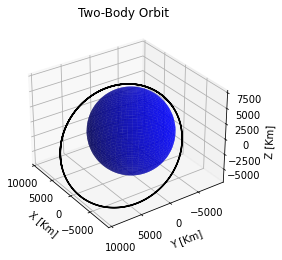

In [56]:
# Define initial state
x_0=-2500  #km
y_0=-5500  #km
z_0=3400   #km
xx_0=7.5   #km/s
yy_0=0.0   #km/s
zz_0=4.0   #km/s
state_0 = [x_0,y_0,z_0,xx_0,yy_0,zz_0]
    
    #Time Array
t=np.linspace(0, 6*3600, 200) 
    
    #solvingg ODE
sol = odeint(model_Earth, state_0, t)
X_sat = sol[:, 0] #X-coord [km] of satellite over time interval
Y_sat = sol[:, 1] #Y-coord
Z_sat = sol[:, 2] #Z-coord [km]
    
    
    #visualizing the Data
    #setting uup spheerical Earth to plot
N = 50
phi=np.linspace(0, 2*np.pi,N)
theta = np.linspace(0,np.pi,N)
theta, phi = np.meshgrid(theta, phi)
    
r_Earth = 6378.14 #Averge radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)
    
    #plottingg Earth and orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.7)
ax.plot3D(X_sat, Y_sat, Z_sat, 'black')
ax.view_init(30, 145) #Changing viewing  angle(adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [Km]')
ax.set_ylabel('Y [Km]')
ax.set_zlabel('Z [Km]')
    
    #Make axes limits
xyzlim = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()]).T
XYZlim = np.asarray([min(xyzlim[0]), max(xyzlim[1])])
ax.set_xlim3d(XYZlim)
ax.set_ylim3d(XYZlim)
ax.set_zlim3d(XYZlim * 3/4)
plt.show()

In [57]:
n_qubit=2
dev = qml.device('default.qubit', wires = n_qubit)

In [5]:
@qml.qnode(dev)
def circuit(theta):
    for i in range(n_qubit):
        qml.Hadamard(wires = i)
        qml.RZ(theta[i], wires = i)
    qml.adjoint(qml.QFT)(wires=range(n_qubit))
    return qml.probs(wires = range(n_qubit))

In [58]:
sv1 =sv.evolve(qc)
print(sv1)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


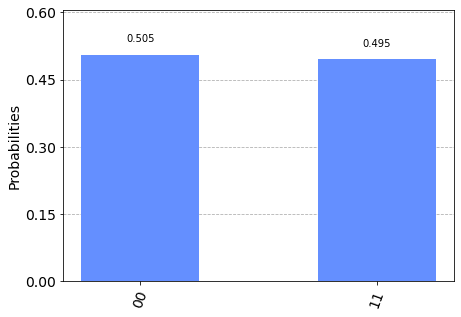

In [59]:
counts = sv1.sample_counts(shots=1000)
plot_histogram(counts)

In [60]:
def full_bells():
    qc = qiskit.QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    return qc
    
    n_qubit=2
    dev = qml.device('default.qubit', wires = n_qubit)
    
    @qml.qnode(dev)
    def circuit(theta):
        for i in range(n_qubit):
            qml.Hadamard(wires = i)
            qml.cx(theta[i], wires = i)
        qml.adjoint(qml.QFT)(wires=range(n_qubit))
        return qml.probs(wires = range(n_qubit))

    def eccentricity(a,b,params):
        c = sqrt(a**2 + b**2)
        probs = circuit(params)
        return sqrt(a**2+b**2)/a
    def ellipticity(a,b,params):
        return a-b/a
    
     # Defining the bounds of the angles
    bounds = np.empty((n, 2))
    for bound in bounds:
        bound[0] = 0
        bound[1] = 2*np.pi
        
    angles, eccentricity,ellipticity = model_Earth(ellipticity,eccentricity)
    angles = angles%(np.pi*2)
    
    sv1 =sv.evolve(qc)
    counts = sv1.sample_counts(shots=1000)
    plot_histogram(counts)
    
    return  circuit, eccentricity, ellipticity

In [65]:
circuit, angles, eccentricity,ellipticity = full_bells(2)
qml.draw_mpl(circuit)(angles)

TypeError: full_bells() takes 0 positional arguments but 1 was given

## TO convert image to Numpy

In [9]:
from PIL import Image
image = Image.open('./File/main_image_deep_field_smacs0723-5mb.jpg')
print(image.format)
print(image.size)
print(image.mode)

JPEG
(2799, 2856)
RGB


In [10]:
#using numpy module to convert images to Numpy array
from numpy import asarray
#load the image and convert in numpy array
img = Image.open('./File/main_image_deep_field_smacs0723-5mb.jpg')
numpydata  =  asarray(img)
print(type(numpydata))
print(numpydata.shape)

<class 'numpy.ndarray'>
(2856, 2799, 3)


In [11]:
#using numpy.array() function
import numpy
np_img = numpy.array(img)
print(np_img.shape)

(2856, 2799, 3)


In [12]:
numpydata  = asarray(img)
print(numpydata)

[[[112 158 182]
  [108 154 190]
  [128 150 207]
  ...
  [ 19  29  31]
  [ 22  24  39]
  [ 35  20  25]]

 [[ 97 172 195]
  [104 166 203]
  [115 163 212]
  ...
  [ 33  32  30]
  [ 31  28  45]
  [ 41  25  25]]

 [[ 98 162 197]
  [116 161 203]
  [143 168 209]
  ...
  [ 43  31  17]
  [ 29  20  11]
  [ 33  20  12]]

 ...

 [[ 39  34  30]
  [ 36  23  30]
  [ 21  19  33]
  ...
  [ 14  21  29]
  [  8  12  13]
  [ 12  16  15]]

 [[ 29  21  19]
  [ 19  19  31]
  [ 21  23  38]
  ...
  [ 11  17  17]
  [ 40  17   9]
  [ 26  15   9]]

 [[ 24  21  30]
  [ 26  21  43]
  [ 32  28  53]
  ...
  [  7   6   4]
  [ 53  27  12]
  [ 42  25  15]]]


In [16]:
np.savez('./File/main_image_deep_field1.npz')

In [19]:
DATA_PATH = ('./File/main_image_deep_field.npy')
data = np.load(DATA_PATH)

In [20]:
sample_train = data['sample_train']
labels_train = data['labels_train']
sample_test = data['sample_test']

# Split train data
sample_train, sample_val, labels_train, labels_val = train_test_split(
    sample_train, labels_train, test_size=0.2, random_state=42)

# Visualize samples
fig = plt.figure()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
LABELS = [0, 2, 3]
num_labels = len(LABELS)
for i in range(num_labels):
    ax = fig.add_subplot(1, num_labels, i+1)
    img = sample_train[labels_train==LABELS[i]][0].reshape((28, 28))
    ax.imshow(img, cmap="Greys")